In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from matplotlib.colors import ListedColormap

In [2]:
# Loading the data from the CSV file
data = pd.read_csv("data_hw1.csv")

In [3]:
data.columns

Index(['Test', 'Propellant age', 'Storage temperature',
       'Pass/fail for application'],
      dtype='object')

In [4]:
X = data[['Propellant age', 'Storage temperature']].values
y = data['Pass/fail for application'].apply(lambda x: 1 if x == 'pass' else 0).values


In [5]:
# for i in range(len(y)):
#     if y[i] =='pass':
#         y[i]=1
#     elif y[i]=='fail':
#         y[i]=0

In [6]:
X

array([[15.5 , 40.  ],
       [23.75, 23.25],
       [ 8.  , 17.  ],
       [17.  , 21.  ],
       [ 5.5 , 10.  ],
       [19.  , 12.  ],
       [24.  , 20.  ],
       [ 2.5 , 12.  ],
       [ 7.5 , 15.  ],
       [11.  , 26.  ]])

In [7]:
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [8]:
# KNN model
def plot_decision_boundary(model, X, y, n_neighbors):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    h = .02  # Step size in the mesh

    # Creating a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predicting the class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshaping the result to create a grid of predictions
    Z = Z.reshape(xx.shape)

    # Plotting the decision boundary and the data points
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plotting training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"kNN Decision Boundary (k={n_neighbors})")
    plt.xlabel('Propellant age (Weeks)')
    plt.ylabel(f'Storage temperature ({chr(176)}C) ')
    plt.show()

In [9]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

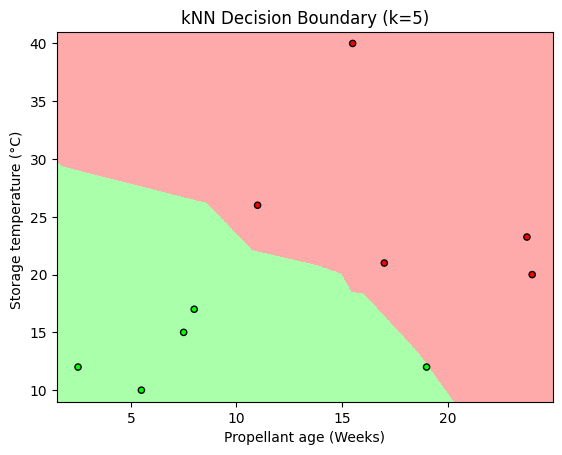

In [10]:
# Plotting decision boundary
plot_decision_boundary(knn, X, y, n_neighbors=5)